## Exploratory Data Analyses (EDA): Time Studies
Here we look into the email volume over the course of years, and group by them by month, day of week, and hour.
The data has been cleaned in the previous sections.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from scipy import stats

In [2]:
# Reading only the necessary columns
df = pd.read_csv('out.csv', index_col='Message-ID', parse_dates=['Date'], infer_datetime_format=True,\
                 usecols=['Message-ID','Date', 'From'] ,low_memory=False)
# Exploring the data
print(df.shape)
print(df.info())
print(df.head())
print(df.dtypes)

(517401, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 517401 entries, <18782981.1075855378110.JavaMail.evans@thyme> to <28618979.1075842030037.JavaMail.evans@thyme>
Data columns (total 2 columns):
Date    517401 non-null datetime64[ns]
From    517401 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 11.8+ MB
None
                                                             Date  \
Message-ID                                                          
<18782981.1075855378110.JavaMail.evans@thyme> 2001-05-14 23:39:00   
<15464986.1075855378456.JavaMail.evans@thyme> 2001-05-04 20:51:00   
<24216240.1075855687451.JavaMail.evans@thyme> 2000-10-18 10:00:00   
<13505866.1075863688222.JavaMail.evans@thyme> 2000-10-23 13:13:00   
<30922949.1075863688243.JavaMail.evans@thyme> 2000-08-31 12:07:00   

                                                                  From  
Message-ID                                                              
<18782981.1075855378110.JavaMail.ev

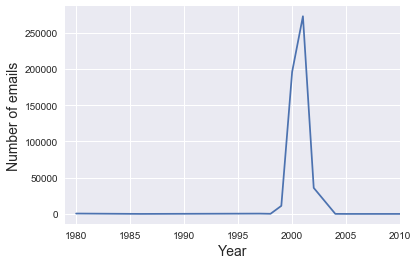

In [3]:
# number of emails sent over years
_ = plt.plot(df.groupby(df['Date'].dt.year)['From'].count())
_ = plt.xlabel('Year', fontsize=14)
_ = plt.ylabel('Number of emails', fontsize=14)
_ = plt.xlim ((1979, 2010))

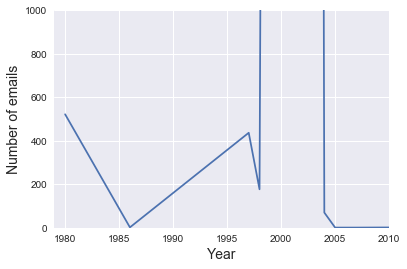

In [4]:
# Zoom in
_ = plt.plot(df.groupby(df['Date'].dt.year)['From'].count())
_ = plt.xlabel('Year', fontsize=14)
_ = plt.ylabel('Number of emails', fontsize=14)
_ = plt.ylim ((0, 1000))
_ = plt.xlim ((1979, 2010))

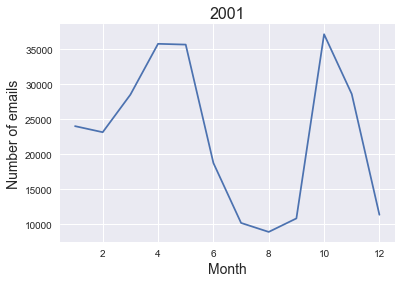

In [5]:
# number of emails grouped by the month for year 2001
# one way of plotting df, look at the next code to see another way of plotting
_ = plt.plot(df[df['Date'].dt.year == 2001].groupby(df['Date'].dt.month)['From'].count())
_ = plt.title('2001', fontsize=16)
_ = plt.xlabel('Month', fontsize=14)
_ = plt.ylabel('Number of emails', fontsize=14)

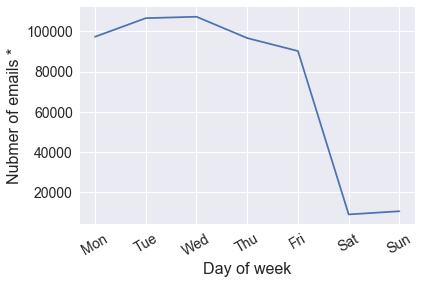

In [6]:
# number of emails grouped by the day of the week
# another way for plotting df
ax = df.groupby(df['Date'].dt.dayofweek)['From'].count().plot()
ax.set_xlabel('Day of week', fontsize=16)
_ = ax.set_ylabel('Nubmer of emails *', fontsize=16) # use _ to avoid seeing extra text
_ = plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=30 , fontsize=14 )
_ = plt.yticks(fontsize=14)

Text(0,0.5,'Number of emails *')

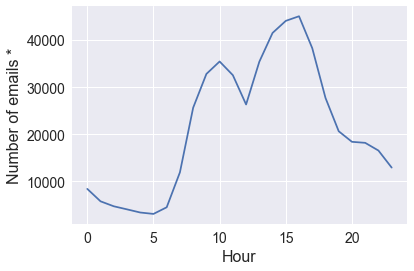

In [7]:
# number of emails grouped by the hour of the day
ax = df.groupby(df['Date'].dt.hour)['From'].count().plot()
_ = plt.yticks(fontsize=14)
_ = plt.xticks(fontsize=14)

ax.set_xlabel('Hour', fontsize=16) 
ax.set_ylabel('Number of emails *', fontsize=16)

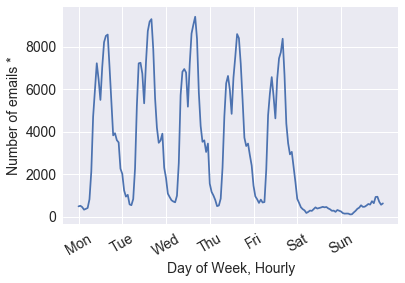

In [8]:
# number of emails grouped by day of week and hour of the day
ax = df.groupby([df['Date'].dt.dayofweek,df['Date'].dt.hour])['From'].count().plot()
ax.set_xlabel('Day of Week, Hourly', fontsize=14)
ax.set_ylabel('Number of emails *', fontsize=14)
# x_start, x_end = ax.get_xlim()
# print(start, end)
_ = plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=30, fontsize= 14)
_ = plt.yticks(fontsize=14)
_ = ax.xaxis.set_ticks(np.arange(0, 168, 24)) # 7 days x 24 hrs = 168 hrs

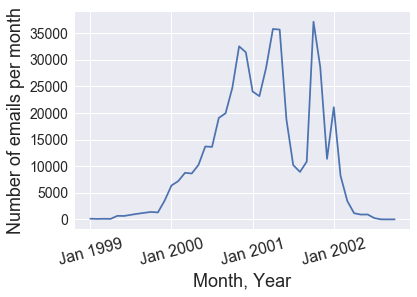

In [9]:
# number of emails grouped by year and month between 1999 to 2003
ax = df[(df['Date'].dt.year > 1998) & (df['Date'].dt.year < 2003)].groupby([df['Date'].dt.year,df['Date'].dt.month])['From'].count().plot()
ax.set_xlabel('Month, Year', fontsize=18)
ax.set_ylabel('Number of emails per month', fontsize=18)
_ = plt.xticks(np.arange(4), ['Jan 1999', 'Jan 2000', 'Jan 2001', 'Jan 2002'], rotation=15, fontsize=16 )
_ = plt.yticks(fontsize=14)
_ = ax.xaxis.set_ticks(np.arange(0, 48, 12)) # 4 years x 12 months = 48 months

## Hypothesis Testing
The question I asked: 
Did employees send more emails when they arrived at work early in the morning or right before leaving work late in the afternoon in 2001? More specifically, is there any significant difference in the email volume between 8 to 10 am and 3 to 5 pm in 2001 excluding weekends?

Motivation: From looking at the hourly email volume in 2000 and 2001 (see below) we can notice a difference between email volume in the mornings and afternoons in 2001. One may interpret a higher volume of emails in the afternoons vs. mornings a sign of procrastination or lack of employees’ interest. 2001 is the year that Enron collapsed beacuse of financial fraud. Enron stock share price went from 80 dollars in Jan 2001 to 0 dollars in Dec 2001. 

Hypothesis Testing: 

Hypothesis: In 2001, employees sent more emails right before leaving work late in the afternoon (3-5 pm) than when they arrived at work early in the morning (8-10 am). 

Null: There is no significant difference between the number of emails sent between 8-10 am and 3-5 pm every day.

I will produce a new test statistics by deducting the number of emails sent between 8-10 am from the number of emails sent between 3-5 pm for each day. 

By conducting a one sample t-test we will see there is a significant difference between the number of email sent in the morning and afternoon in 2001. 

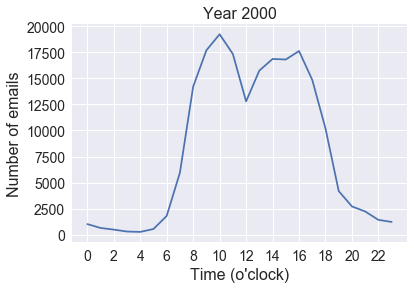

In [10]:
# number of emails grouped by the hour of the day in 2000
ax = df[df['Date'].dt.year ==2000].groupby(df['Date'].dt.hour)['From'].count().plot()
ax.set_title('Year 2000', fontsize=16) 
ax.set_xlabel("Time (o'clock)", fontsize=16) 
ax.set_ylabel('Number of emails', fontsize=16)
_ = plt.xticks(np.arange(12), fontsize=14 )
_ = plt.yticks(fontsize=14)
_ = ax.xaxis.set_ticks(np.arange(0, 24, 2))

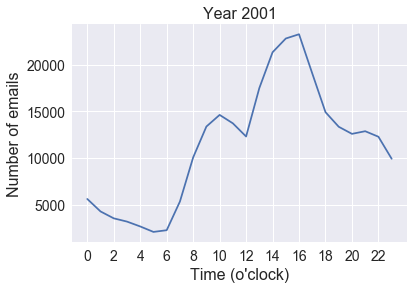

In [11]:
# number of emails grouped by the hour of the day in 2001
ax = df[df['Date'].dt.year ==2001].groupby(df['Date'].dt.hour)['From'].count().plot()
ax.set_title('Year 2001', fontsize=16) 
ax.set_xlabel("Time (o'clock)", fontsize=16) 
ax.set_ylabel('Number of emails', fontsize=16)
_ = plt.xticks(np.arange(12), fontsize=14 )
_ = plt.yticks(fontsize=14)
_ = ax.xaxis.set_ticks(np.arange(0, 24, 2))

In [12]:
# selecting 2001 and removing weekends from data
df_weekdays = df.loc[((df['Date'].dt.year == 2001) & \
                      (df['Date'].dt.dayofweek != 5) & (df['Date'].dt.dayofweek != 6)), ['Date', 'From']]
# adding a column for Date without the hour information which will be used for groupby date
df_weekdays['Date_no_hr'] = df_weekdays['Date'].dt.date
df_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261102 entries, <18782981.1075855378110.JavaMail.evans@thyme> to <28618979.1075842030037.JavaMail.evans@thyme>
Data columns (total 3 columns):
Date          261102 non-null datetime64[ns]
From          261102 non-null object
Date_no_hr    261102 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 8.0+ MB


In [13]:
# building a dataframe for emails between 8 to 10 am
df_am = df_weekdays[(df_weekdays['Date'].dt.hour >= 8) & (df_weekdays['Date'].dt.hour <= 10)]
df_am.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36966 entries, <30467968.1075855723641.JavaMail.evans@thyme> to <22366359.1075842015237.JavaMail.evans@thyme>
Data columns (total 3 columns):
Date          36966 non-null datetime64[ns]
From          36966 non-null object
Date_no_hr    36966 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.1+ MB


In [14]:
# building a dataframe for emails between 3 to 5 pm
df_pm = df_weekdays[(df_weekdays['Date'].dt.hour >= 15) & (df_weekdays['Date'].dt.hour <= 17)]
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63390 entries, <27936946.1075855378542.JavaMail.evans@thyme> to <28979867.1075842029988.JavaMail.evans@thyme>
Data columns (total 3 columns):
Date          63390 non-null datetime64[ns]
From          63390 non-null object
Date_no_hr    63390 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.9+ MB


In [15]:
# groupby Date and count the number of emails between 8-10 am
df_am_g = df_am.groupby(['Date_no_hr'])['From'].count().reset_index() # without reset index >> series
df_am_g.columns=['Date', 'Count_am']
df_am_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 2 columns):
Date        259 non-null object
Count_am    259 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [16]:
# statistical summary for the number of emails sent between 8-10 am
df_am_g['Count_am'].describe()

count    259.000000
mean     142.725869
std      148.486075
min        1.000000
25%       10.000000
50%       49.000000
75%      293.500000
max      488.000000
Name: Count_am, dtype: float64

In [17]:
# groupby Date and count the number of emails sent between 3-5 pm
df_pm_g = df_pm.groupby(['Date_no_hr'])['From'].count().reset_index() # without reset_index >> series
df_pm_g.columns=['Date', 'Count_pm']
df_pm_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Date        261 non-null object
Count_pm    261 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [18]:
# statistical summary for the number of emails sent between 3-5 pm
df_pm_g['Count_pm'].describe()

count    261.000000
mean     242.873563
std      145.987576
min        8.000000
25%      119.000000
50%      231.000000
75%      340.000000
max      734.000000
Name: Count_pm, dtype: float64

In [19]:
# inner join of the two dataframes on the Date column
df_pm_am = pd.merge(df_am_g, df_pm_g, on='Date', how='inner')
df_pm_am.head()

,Date,Count_am,Count_pm
0,2001-01-01,6,18
1,2001-01-02,304,252
2,2001-01-03,271,327
3,2001-01-04,265,275
4,2001-01-05,257,289


In [20]:
# caculating the test-statistic and building a new column for it
df_pm_am['pm-am'] = df_pm_am['Count_pm']-df_pm_am['Count_am']
df_pm_am.head()

,Date,Count_am,Count_pm,pm-am
0,2001-01-01,6,18,12
1,2001-01-02,304,252,-52
2,2001-01-03,271,327,56
3,2001-01-04,265,275,10
4,2001-01-05,257,289,32


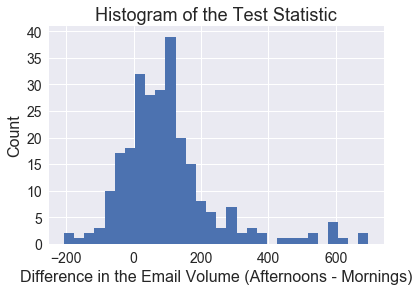

In [21]:
# histogram of the test-statistic, looks good for a t-test
_ = plt.hist(df_pm_am['pm-am'], bins=30)
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)
_ = plt.xlabel('Difference in the Email Volume (Afternoons - Mornings)', fontsize=16)
_ = plt.ylabel('Count', fontsize=16)
_ = plt.title('Histogram of the Test Statistic', fontsize=18)

In [22]:
# statistical summary for the test-statistic
df_pm_am['pm-am'].describe()

count    259.000000
mean     101.366795
std      144.849804
min     -207.000000
25%       12.000000
50%       81.000000
75%      139.500000
max      697.000000
Name: pm-am, dtype: float64

In [23]:
# conducting a one sample t-test
stats.ttest_1samp(df_pm_am['pm-am'], 0)

Ttest_1sampResult(statistic=11.262315438226411, pvalue=3.3979699819886472e-24)

In [24]:
# confidence interval for the test-statistic
stats.norm.interval(0.95, loc=np.mean(df_pm_am['pm-am']), scale=np.std(df_pm_am['pm-am'])/np.sqrt(len(df_pm_am['pm-am'])))
# scale= std or sem. sem: std/sqrt(N) confidence in the mean of N draws
# for a single draw (scale = std) the CI became (-181.98500329672487, 384.71859403031561)

(83.7601712836383, 118.97341944995244)

### Statistical Inference
In 2001, Enron employees on average sent 71% more emails between 3-5 pm than 8-10 am on a daily basis (p-value: 3e-24).

The average difference between the number of emails sent in the morning and in the afternoon is 110 emails on a daily basis. The 95% confidence interval is (83.8, 119.0).

It is good to mention that on average Enron employees sent 1008 emails every day excluding weekends.